In [17]:
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('hospital_visits.csv')
df

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.00,NaN,NaN
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,NaN,NaN
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03T14:32:11Z,2011-01-03T14:47:11Z,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,NaN,NaN
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03T16:24:45Z,2011-01-03T16:39:45Z,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,1784.24,0.00,NaN,NaN
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03T17:36:53Z,2011-01-03T17:51:53Z,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,234.72,0.00,55822004.0,Hyperlipidemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27886,917bb534-2ed3-e1f5-ac27-74f314d19c63,2022-01-29T11:42:06Z,2022-01-29T11:57:06Z,0c122290-8c15-77ac-b418-2fea4e8a8e6a,d78e84ec-30aa-3bba-a33a-f29a3a454662,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,outpatient,185349003,Encounter for check up (procedure),85.55,85.55,24.27,NaN,NaN
27887,07710480-9d6b-9c9b-87c3-c1d54df4069d,2022-01-29T20:12:53Z,2022-01-29T20:27:53Z,20a4bc24-6b69-2f5c-dc74-1df390cae25b,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,urgentcare,702927004,Urgent care clinic (procedure),142.58,10588.34,8438.67,NaN,NaN
27888,01b57f06-cebe-a3e4-4423-a796ffb0c35d,2022-01-29T20:35:37Z,2022-01-29T20:50:37Z,ff1b3c26-53a6-4590-ce79-a3f7269274ea,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,424619006,Prenatal visit,142.58,11984.29,0.00,72892002.0,Normal pregnancy
27889,7d435668-0813-eb3b-0f26-cb741fb39561,2022-01-29T20:35:37Z,2022-01-29T20:50:37Z,ff1b3c26-53a6-4590-ce79-a3f7269274ea,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,408.80,0.00,NaN,NaN


In [25]:
#Convert columns to datetime

df['START'] = pd.to_datetime(df['START'])
df['STOP'] = pd.to_datetime(df['STOP'])
df

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02 09:26:36+00:00,2011-01-02 12:58:36+00:00,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.00,NaN,NaN
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03 05:44:39+00:00,2011-01-03 06:01:42+00:00,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,NaN,NaN
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03 14:32:11+00:00,2011-01-03 14:47:11+00:00,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,NaN,NaN
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03 16:24:45+00:00,2011-01-03 16:39:45+00:00,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,1784.24,0.00,NaN,NaN
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03 17:36:53+00:00,2011-01-03 17:51:53+00:00,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,234.72,0.00,55822004.0,Hyperlipidemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27886,917bb534-2ed3-e1f5-ac27-74f314d19c63,2022-01-29 11:42:06+00:00,2022-01-29 11:57:06+00:00,0c122290-8c15-77ac-b418-2fea4e8a8e6a,d78e84ec-30aa-3bba-a33a-f29a3a454662,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,outpatient,185349003,Encounter for check up (procedure),85.55,85.55,24.27,NaN,NaN
27887,07710480-9d6b-9c9b-87c3-c1d54df4069d,2022-01-29 20:12:53+00:00,2022-01-29 20:27:53+00:00,20a4bc24-6b69-2f5c-dc74-1df390cae25b,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,urgentcare,702927004,Urgent care clinic (procedure),142.58,10588.34,8438.67,NaN,NaN
27888,01b57f06-cebe-a3e4-4423-a796ffb0c35d,2022-01-29 20:35:37+00:00,2022-01-29 20:50:37+00:00,ff1b3c26-53a6-4590-ce79-a3f7269274ea,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,424619006,Prenatal visit,142.58,11984.29,0.00,72892002.0,Normal pregnancy
27889,7d435668-0813-eb3b-0f26-cb741fb39561,2022-01-29 20:35:37+00:00,2022-01-29 20:50:37+00:00,ff1b3c26-53a6-4590-ce79-a3f7269274ea,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,408.80,0.00,NaN,NaN


In [27]:
#Cqalculate time differece in hours
df['DURATION'] = (df['STOP'] - df['START']).dt.total_seconds()/3600      #Duration in hours
df

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,DURATION
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02 09:26:36+00:00,2011-01-02 12:58:36+00:00,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.00,NaN,NaN,3.533333
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03 05:44:39+00:00,2011-01-03 06:01:42+00:00,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,NaN,NaN,0.284167
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03 14:32:11+00:00,2011-01-03 14:47:11+00:00,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,NaN,NaN,0.250000
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03 16:24:45+00:00,2011-01-03 16:39:45+00:00,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,1784.24,0.00,NaN,NaN,0.250000
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03 17:36:53+00:00,2011-01-03 17:51:53+00:00,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,234.72,0.00,55822004.0,Hyperlipidemia,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27886,917bb534-2ed3-e1f5-ac27-74f314d19c63,2022-01-29 11:42:06+00:00,2022-01-29 11:57:06+00:00,0c122290-8c15-77ac-b418-2fea4e8a8e6a,d78e84ec-30aa-3bba-a33a-f29a3a454662,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,outpatient,185349003,Encounter for check up (procedure),85.55,85.55,24.27,NaN,NaN,0.250000
27887,07710480-9d6b-9c9b-87c3-c1d54df4069d,2022-01-29 20:12:53+00:00,2022-01-29 20:27:53+00:00,20a4bc24-6b69-2f5c-dc74-1df390cae25b,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,urgentcare,702927004,Urgent care clinic (procedure),142.58,10588.34,8438.67,NaN,NaN,0.250000
27888,01b57f06-cebe-a3e4-4423-a796ffb0c35d,2022-01-29 20:35:37+00:00,2022-01-29 20:50:37+00:00,ff1b3c26-53a6-4590-ce79-a3f7269274ea,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,424619006,Prenatal visit,142.58,11984.29,0.00,72892002.0,Normal pregnancy,0.250000
27889,7d435668-0813-eb3b-0f26-cb741fb39561,2022-01-29 20:35:37+00:00,2022-01-29 20:50:37+00:00,ff1b3c26-53a6-4590-ce79-a3f7269274ea,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,408.80,0.00,NaN,NaN,0.250000


In [31]:
#Compute average event per time per unit
avg_duration = df['DURATION'].mean()
print(f"Average duration in hours: {avg_duration}")

Average duration in hours: 7.265994695620651


In [33]:
#Define range for Poisson distribution eg around the average
k = range(int(avg_duration)-5, int(avg_duration) + 6) #+ or - 5 
k

range(2, 13)

In [35]:
probabilities = poisson.pmf(k, avg_duration)
probabilities

array([0.01844925, 0.04468405, 0.08116853, 0.11795402, 0.14284221,
       0.14827011, 0.13466623, 0.10872045, 0.07899622, 0.05218056,
       0.0315953 ])

In [39]:
#Print probabilites
print('Poisson Probabilities for each k :')

for duration, prob in zip(k, probabilities):
    print(f"{duration} hours: {prob}")

Poisson Probabilities for each k :
2 hours: 0.018449251680549172
3 hours: 0.04468405494968024
4 hours: 0.08116852656079951
5 hours: 0.11795401668842276
6 hours: 0.14284220993087143
7 hours: 0.14827010566692064
8 hours: 0.13466622516186974
9 hours: 0.10872045307837803
10 hours: 0.07899622353729686
11 hours: 0.05218055829055117
12 hours: 0.03159530497947241


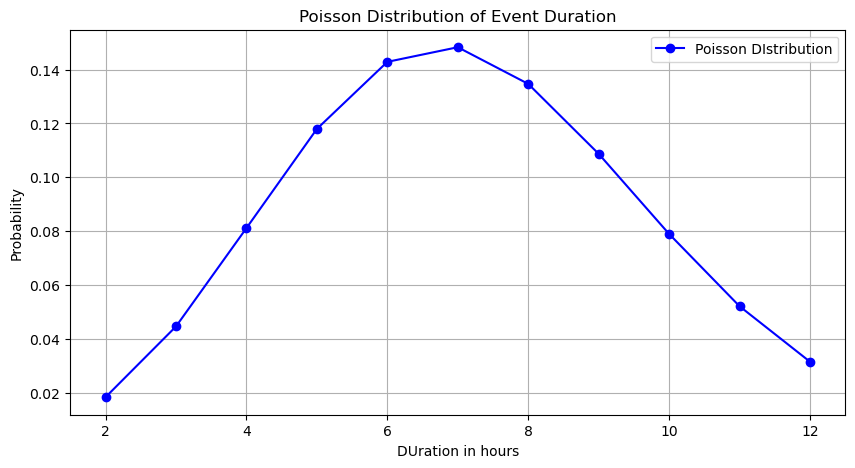

In [47]:

#plot poisson distribution
plt.figure(figsize= (10,5))

plt.plot(k,probabilities,label='Poisson DIstribution', marker='o',color='blue')
plt.xlabel('Duration in hours')
plt.ylabel('Probability')
plt.title('Poisson Distribution of Event Duration')
plt.legend()
plt.grid(True)
plt.show()

# Assigment - Retail data transaction 

In [57]:
#USe dataset and find average number of daily transactions. Estimate and plot probabilities of average +/-10 transactions.
#Use poisson distribution 

In [61]:
retail_df = pd.read_csv("Retail_Data_Transactions.csv")

In [63]:
retail_df

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [129]:
Number_of_Transaction = retail_df.groupby('trans_date')

In [131]:
new_df = Number_of_Transaction.count()

In [133]:
new_df

,customer_id,tran_amount
trans_date,,
01-Apr-12,84,84
01-Apr-13,70,70
01-Apr-14,96,96
01-Aug-11,102,102
01-Aug-12,83,83
...,...,...
31-May-14,75,75
31-Oct-11,87,87
31-Oct-12,92,92


In [135]:
AVERAGE = new_df['customer_id'].mean()

In [137]:
AVERAGE

89.22198429693077

In [139]:
k = range(int(AVERAGE)-10, int(AVERAGE) + 11) 
k

range(79, 100)

In [141]:
probabilities = poisson.pmf(k,AVERAGE)

In [143]:
probabilities

array([0.02437952, 0.02718986, 0.0299498 , 0.03258757, 0.03503045,
       0.03720817, 0.03905631, 0.04051956, 0.04155443, 0.04213146,
       0.04223655, 0.04187143, 0.04105332, 0.03981368, 0.03819629,
       0.03625478, 0.03404972, 0.03164566, 0.02910813, 0.02650087,
       0.02388344])

In [145]:
#Print probabilites
print('Poisson Probabilities for each k :')

for duration, prob in zip(k, probabilities):
    print(f"{duration} transactions: {prob}")

Poisson Probabilities for each k :
79 transactions: 0.02437952051900133
80 transactions: 0.027189864961409158
81 transactions: 0.029949798822501268
82 transactions: 0.03258756683216402
83 transactions: 0.03503045031535663
84 transactions: 0.03720817009465834
85 transactions: 0.03905631491650662
86 transactions: 0.04051955716484475
87 transactions: 0.041554428656093205
88 transactions: 0.042131461147978166
89 transactions: 0.042236545673614866
90 transactions: 0.04187142683164226
91 transactions: 0.04105331634354439
92 transactions: 0.039813677675442444
93 transactions: 0.03819629381033796
94 transactions: 0.03625477794199035
95 transactions: 0.03404971819188397
96 transactions: 0.0316456606440737
97 transactions: 0.02910813027888245
98 transactions: 0.026500868802606953
99 transactions: 0.023883435355164025


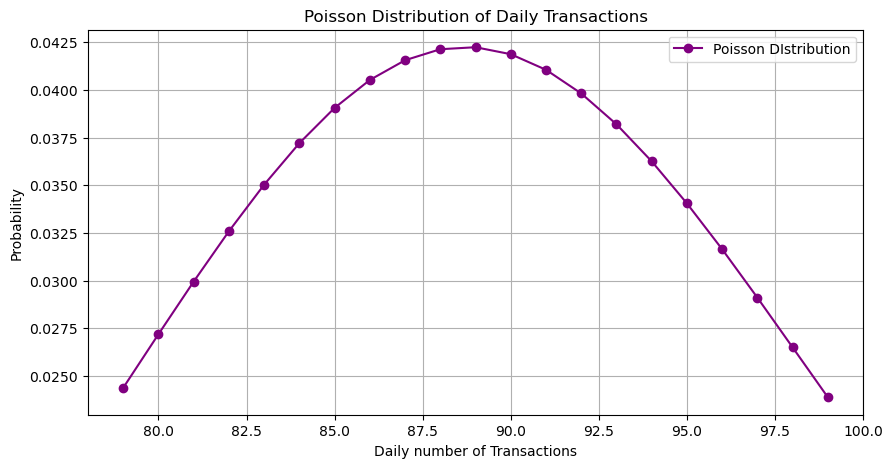

In [147]:
#plot poisson distribution
plt.figure(figsize= (10,5))

plt.plot(k,probabilities,label='Poisson DIstribution',color='purple',marker='o')
plt.xlabel('Daily number of Transactions')
plt.ylabel('Probability')
plt.title('Poisson Distribution of Daily Transactions')
plt.legend()
plt.grid(True)
plt.show()

# Geometric Distribution

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [154]:
df = pd.read_csv("Tips.csv")

In [156]:
#Define the Threshold for a generous tipper
avg_tip = df['tip'].mean()
avg_tip

2.99827868852459

In [158]:
generous_tippers = df[df['tip'] > avg_tip]
generous_tippers

,total_bill,tip,gender,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6.011810e+15,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4.676140e+15,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4.832730e+15,Sun2251
5,25.29,4.71,Male,No,Sun,Dinner,4,6.32,Erik Smith,2.131400e+14,Sun9679
7,26.88,3.12,Male,No,Sun,Dinner,4,6.72,Robert Buck,3.514790e+15,Sun8157
...,...,...,...,...,...,...,...,...,...,...,...
232,11.61,3.39,Male,No,Sat,Dinner,2,5.80,James Taylor,6.011480e+15,Sat2124
234,15.53,3.00,Male,Yes,Sat,Dinner,2,7.76,Tracy Douglas,4.097940e+15,Sat7220
238,35.83,4.67,Female,No,Sat,Dinner,3,11.94,Kimberly Crane,6.761840e+11,Sat9777
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5.296070e+15,Sat2657


In [161]:
#Calculate the probability of a generous tipper
p= len(generous_tippers)/len(df)
p # probability of customer giving tip abve average is 49.5%

0.4959016393442623

In [163]:
# Expected number of customers untill the first generous tipper(geometric Distribution)
# As we know expected value of geometric distribution is :1/p
Expected_trials = 1/p
# to get the first generous tipper , we would need to wait for 2 customer

In [165]:
Expected_trials

2.0165289256198347

In [167]:
#Stimulate the geometric distribution for demonstration
#geometric(p) : This function generates random values following a geometric distribution ,which models the number of trials
#(or attemps) required before the first success occurs
#p is the probability of success on each trial
# (i.e. the probability of a customer tipping generous)
#Set the probability of success p(0.5 to get an expected value of 2 trials)
p = 0.495

In [169]:
#Stimulate geometric distribution for 1000 trials
Stimulate_trials = np.random.geometric(p,size=1000)

In [171]:
Stimulate_trials

array([2, 1, 4, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 3, 2, 2,
       4, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 1, 1, 1, 4, 3, 3, 1, 1, 4,
       1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1,
       1, 1, 2, 1, 2, 3, 1, 1, 2, 1, 2, 5, 2, 4, 1, 1, 1, 1, 1, 1, 1, 8,
       2, 6, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 5, 1, 1, 1, 2, 3, 1, 1, 3, 2,
       1, 3, 1, 1, 3, 1, 1, 1, 2, 6, 4, 1, 1, 1, 1, 3, 4, 1, 2, 2, 2, 3,
       1, 2, 3, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 2, 5, 1, 3, 4, 1, 5, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 5, 4, 1, 2, 1, 1, 2, 3, 2, 1,
       3, 4, 1, 2, 1, 1, 1, 3, 1, 1, 3, 2, 1, 1, 2, 2, 3, 1, 1, 1, 2, 3,
       2, 2, 1, 1, 2, 1, 3, 2, 2, 1, 3, 2, 2, 5, 1, 4, 2, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 3, 5, 1, 7, 2, 3, 1, 1, 1, 2, 1, 2, 2, 4, 5, 2, 2, 3,
       1, 1, 2, 2, 1, 1, 3, 3, 9, 1, 1, 3, 1, 3, 2, 2, 2, 2, 1, 4, 6, 2,
       4, 2, 1, 1, 1, 2, 1, 3, 1, 1, 3, 1, 2, 7, 5, 3, 1, 2, 2, 1, 3, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2,

Expected number of customers to find a generous tipper:2.0165289256198347


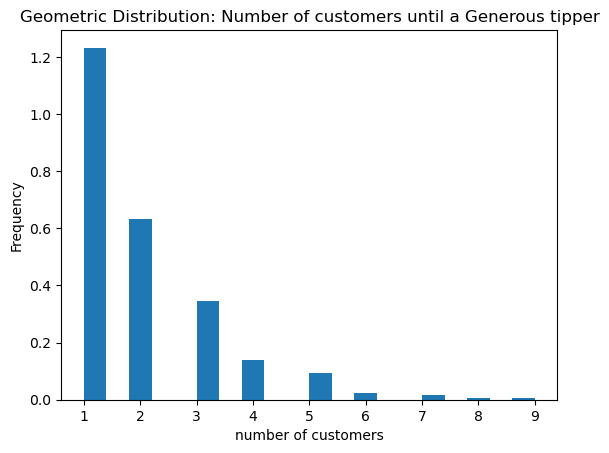

In [187]:
#plot the distribution
plt.hist(Stimulate_trials,bins=20,density=True)
plt.title("Geometric Distribution: Number of customers until a Generous tipper")
plt.xlabel("number of customers")
plt.ylabel("Frequency")

print(f"Expected number of customers to find a generous tipper:{Expected_trials}")

# Titanic DataSet

In [192]:
#After how many passengers we need to skip before we see the first surviving passenger?

titanic_df = pd.read_csv('Titanic.csv')

In [203]:
titanic_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [210]:
survived = titanic_df[titanic_df['Survived']==1]

In [234]:
survived



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S


In [236]:
p = len(survived)/ len(titanic_df)
p

0.36363636363636365

In [238]:
expected_survival = 1/p
expected_survival

2.75

In [240]:
np.random.seed(42)
Survived_trials = np.random.geometric(p,size=1000)

In [242]:
Survived_trials

array([ 2,  7,  3,  3,  1,  1,  1,  5,  3,  3,  1,  8,  4,  1,  1,  1,  1,
        2,  2,  1,  3,  1,  1,  2,  2,  4,  1,  2,  2,  1,  3,  1,  1,  7,
        8,  4,  1,  1,  3,  2,  1,  2,  1,  6,  1,  3,  1,  2,  2,  1,  8,
        4,  7,  5,  3,  6,  1,  1,  1,  1,  2,  1,  4,  1,  1,  2,  1,  4,
        1, 10,  4,  1,  1,  4,  3,  3,  4,  1,  1,  1,  5,  3,  1,  1,  1,
        1,  3,  3,  5,  2,  1,  3,  4,  2,  4,  2,  2,  2,  1,  1,  1,  3,
        1,  2,  6,  1,  2,  4,  1,  1,  1,  1,  6,  4,  3,  5,  4,  1,  5,
        2,  4,  6,  1,  1,  1,  2,  4,  5,  1,  2,  2,  1,  1,  1,  7,  1,
        2,  3,  1,  8,  8,  1,  2,  1,  1,  1,  3,  2,  1,  1,  6,  1,  1,
        2, 10,  1,  3,  4,  1,  3,  2,  3,  3,  2,  1,  4,  1,  1,  1,  2,
        3,  1,  2,  1,  3,  1,  3,  2,  7,  1,  1,  1,  6,  5,  1,  3,  4,
        2,  2,  1,  1,  6,  6,  3,  1,  1,  3,  6,  5,  4,  3,  1,  1,  6,
        3,  1,  1,  3,  1,  1,  2,  3,  3,  1,  3,  1,  1,  4,  3,  5,  3,
        2,  1,  2,  1,  1

Expected number of customers to find a generous tipper:2.0165289256198347


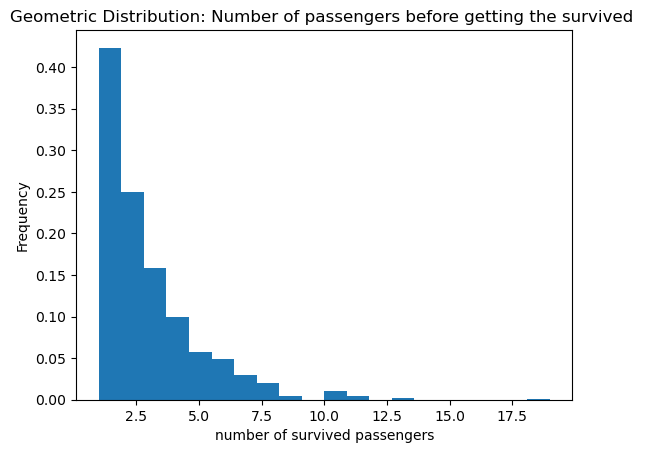

In [244]:
#plot the distribution
plt.hist(Survived_trials,bins=20,density=True)
plt.title("Geometric Distribution: Number of passengers before getting the survived ")
plt.xlabel("number of survived passengers")
plt.ylabel("Frequency")

print(f"Expected number of customers to find a generous tipper:{Expected_trials}")